## 테스트용 파일이름 추출 및 정리
### 캡션 예측용 사진 다운로드
### 모델훈련시 저장한 테스트용 데이터 파일 로드 후 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import collections
import random
import numpy as np
import os
import time
import json
from PIL import Image

In [ ]:
# Download image files
image_folder = '/train2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('train2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin='http://images.cocodataset.org/zips/train2014.zip',
                                      extract=True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)


else:
  PATH = os.path.abspath('.') + image_folder

image_folder = '/val2014/'
if not os.path.exists(os.path.abspath('.') + image_folder):
  image_zip = tf.keras.utils.get_file('val2014.zip',
                                      cache_subdir=os.path.abspath('.'),
                                      origin='http://images.cocodataset.org/zips/val2014.zip',
                                      extract=True)
  PATH = os.path.dirname(image_zip) + image_folder
  os.remove(image_zip)
else:
  PATH = os.path.abspath('.') + image_folder

6645022720/6645013297 [==============================] - 144s 0us/step


In [ ]:
# 드라이브에 폴더생성
os.mkdir("/content/Multi")

In [ ]:
!unzip -uq "/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/02. 데이터/caption/MultiModule.zip" -d "/content/Multi/"

In [ ]:
len(os.listdir("/content/Multi"))

24010

In [ ]:
PATH = '/content/'

In [ ]:
import pandas as pd
df_MS = pd.read_csv('/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/02. 데이터/caption/MS_COCO_데이터정리(완료).csv')
df_MS['사진경로'] = PATH + df_MS['사진경로']
print(len(df_MS))
df_MS.head()

616767


,사진경로,캡셔닝_데이터
0,/content/val2014/COCO_val2014_000000391895.jpg,빨간 헬멧을 쓴 남자가 작은 모터 달린 비포장도로를 달려 있다
1,/content/val2014/COCO_val2014_000000391895.jpg,시골의 비포장도로에서 오토바이를 타는 남자
2,/content/val2014/COCO_val2014_000000391895.jpg,오토바이 뒤에 탄 남자
3,/content/val2014/COCO_val2014_000000391895.jpg,오토바이 위에 젊은이가 탄 비포장도로는 다리가 있는 초록빛 지역의 전경과 구름 낀 ...
4,/content/val2014/COCO_val2014_000000391895.jpg,빨간 셔츠와 빨간 모자를 쓴 남자가 언덕 쪽 오토바이 위에 있다


In [ ]:
# import pandas as pd
df_Multi = pd.read_csv('/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/02. 데이터/caption/멀티모달_데이터정리(완료).csv')
df_Multi['사진경로'] = '/content/' + df_Multi['사진이름']
print(len(df_Multi))
df_Multi.head()

119825


,사진경로,사진이름,캡셔닝_데이터(종합),캡셔닝_데이터,캡셔닝_데이터(수정)
0,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들이 있다,start 남자들이 있다 end
1,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자들은 서로 쳐다보고 있다,start 남자들은 서로 쳐다보고 있다 end
2,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 검정 머리이다,start 남자는 검정 머리이다 end
3,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 흰 셔츠를 입고 있다,start 남자는 흰 셔츠를 입고 있다 end
4,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,KETI_SHOT_0000145756_KM_0000000448.jpg,"['남자들이 있다', '남자들은 서로 쳐다보고있다', '남자는 검정머리이다', '남...",남자는 옆을 보고 있다,start 남자는 옆을 보고 있다 end


In [ ]:
# 테스트용 파일 이름 csv 호출
# import pandas as pd
df_test = pd.read_csv('/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/03. 코드/bleu/image_Captioning(한글_Tensorflow_model_Keras)BLEU/testImage_Name.csv')
print(len(df_test))
df_test.head()

14727


,testImage_Name
0,/content/train2014/COCO_train2014_000000457734...
1,/content/train2014/COCO_train2014_000000306060...
2,/content/train2014/COCO_train2014_000000283666...
3,/content/train2014/COCO_train2014_000000452985...
4,/content/train2014/COCO_train2014_000000318924...


In [ ]:
# BLEU 레퍼렌스 데이터 추출
df_test_bleu = pd.merge(df_test, df_MS, left_on='testImage_Name', right_on='사진경로', how='left')[['사진경로', '캡셔닝_데이터']]
df_test_bleu.head(10)

,사진경로,캡셔닝_데이터
0,/content/train2014/COCO_train2014_000000457734...,한 여성이 자신의 자동차에서 얼룩말의 사진을 찍는다
1,/content/train2014/COCO_train2014_000000457734...,어른 얼룩말이 차의 조수석 창문 근처에 서 있다
2,/content/train2014/COCO_train2014_000000457734...,밝은 날에 차 옆에 서 있는 얼룩말
3,/content/train2014/COCO_train2014_000000457734...,차량 근처에 서 있는 얼룩말의 근접 촬영지입니다
4,/content/train2014/COCO_train2014_000000457734...,얼룩말과 측면 거울에 비친 암컷
5,/content/train2014/COCO_train2014_000000306060...,두 사람이 해변에서 말을 타고 있다
6,/content/train2014/COCO_train2014_000000306060...,남자와 여자가 해변에서 말을 타고 있다
7,/content/train2014/COCO_train2014_000000306060...,해변에 두 마리의 갈색 말을 탄 남자와 여자가 있다
8,/content/train2014/COCO_train2014_000000306060...,해변에서 말을 타는 소녀와 남자
9,/content/train2014/COCO_train2014_000000306060...,두 사람이 해변에서 말을 타고 있다


## 체크포인트 불러와서 테스트할 모델 로드하기


In [ ]:
# 사진 리사이징시 오류가 생기는 사진 파일 제외
df_Multi = df_Multi[df_Multi['사진이름'] != 'KETI_SHOT_0000142253_KM_0000014468.jpg']
df_Multi = df_Multi[df_Multi['사진이름'] != 'KETI_SHOT_0000123067_KM_0000000834.jpg']
df_Multi.reset_index(drop = True, inplace = True)

In [ ]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299)) 
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [ ]:
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
# Feel free to change these parameters according to your system's configuration
# 해당 모델에 들어가야하는 필수 변수들이며, 학습시킬때의 수치와 일치화 시켜주었습니다.
BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = 76344
max_length = 41
# num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

In [ ]:
import pandas as pd
df_Tk = pd.read_csv('/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/03. 코드/bleu/image_Captioning(한글_Tensorflow_model_Keras)BLEU/tokenizer(index_word).csv')
df_Tk.head()

,key,value
0,1,<unk>
1,2,<start>
2,3,<end>
3,4,있다
4,5,있는


In [ ]:
top_k = 76344
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.word_index = dict(zip(df_Tk['value'], df_Tk['key']))
tokenizer.index_word = dict(zip(df_Tk['key'], df_Tk['value']))
len(tokenizer.index_word ) ,len(tokenizer.word_index)

(76343, 76343)

In [ ]:
# 테스트 항목 제외
mask = df_MS['사진경로'].isin(df_test['testImage_Name'])
tok_df_MS = df_MS[~mask]
tok_df_MS

,사진경로,캡셔닝_데이터
0,/content/val2014/COCO_val2014_000000391895.jpg,빨간 헬멧을 쓴 남자가 작은 모터 달린 비포장도로를 달려 있다
1,/content/val2014/COCO_val2014_000000391895.jpg,시골의 비포장도로에서 오토바이를 타는 남자
2,/content/val2014/COCO_val2014_000000391895.jpg,오토바이 뒤에 탄 남자
3,/content/val2014/COCO_val2014_000000391895.jpg,오토바이 위에 젊은이가 탄 비포장도로는 다리가 있는 초록빛 지역의 전경과 구름 낀 ...
4,/content/val2014/COCO_val2014_000000391895.jpg,빨간 셔츠와 빨간 모자를 쓴 남자가 언덕 쪽 오토바이 위에 있다
...,...,...
543087,/content/train2014/COCO_train2014_000000093864...,낮에 풀밭에서 풀을 뜯고 있는 얼룩말
543088,/content/train2014/COCO_train2014_000000093864...,어른 얼룩말이 길을 따라 풀을 뜯고 있다
543089,/content/train2014/COCO_train2014_000000093864...,얼룩말은 더러운 길에 서서 풀을 향해 몸을 기울인다
543090,/content/train2014/COCO_train2014_000000093864...,얼룩말이 길의 타이어 자국에 서 있다


In [ ]:
tok_df_Mul = df_Multi[['사진경로', '캡셔닝_데이터']]
tok_df_Mul

,사진경로,캡셔닝_데이터
0,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,남자들이 있다
1,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,남자들은 서로 쳐다보고 있다
2,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,남자는 검정 머리이다
3,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,남자는 흰 셔츠를 입고 있다
4,/content/KETI_SHOT_0000145756_KM_0000000448.jpg,남자는 옆을 보고 있다
...,...,...
119810,/content/KETI_SHOT_0000148199_KM_0000004318.jpg,여자가 앞쪽을 보고 있다
119811,/content/KETI_SHOT_0000148199_KM_0000004318.jpg,여자는 입을 다물고 있다
119812,/content/KETI_SHOT_0000148199_KM_0000004318.jpg,여자는 외투를 입었다
119813,/content/KETI_SHOT_0000148199_KM_0000004318.jpg,여자의 외투에는 털이 달려있다


In [ ]:
tok_df = pd.concat([tok_df_MS, tok_df_Mul])
tok_df.reset_index(drop=True, inplace=True)
tok_df

,사진경로,캡셔닝_데이터
0,/content/val2014/COCO_val2014_000000391895.jpg,빨간 헬멧을 쓴 남자가 작은 모터 달린 비포장도로를 달려 있다
1,/content/val2014/COCO_val2014_000000391895.jpg,시골의 비포장도로에서 오토바이를 타는 남자
2,/content/val2014/COCO_val2014_000000391895.jpg,오토바이 뒤에 탄 남자
3,/content/val2014/COCO_val2014_000000391895.jpg,오토바이 위에 젊은이가 탄 비포장도로는 다리가 있는 초록빛 지역의 전경과 구름 낀 ...
4,/content/val2014/COCO_val2014_000000391895.jpg,빨간 셔츠와 빨간 모자를 쓴 남자가 언덕 쪽 오토바이 위에 있다
...,...,...
662902,/content/KETI_SHOT_0000148199_KM_0000004318.jpg,여자가 앞쪽을 보고 있다
662903,/content/KETI_SHOT_0000148199_KM_0000004318.jpg,여자는 입을 다물고 있다
662904,/content/KETI_SHOT_0000148199_KM_0000004318.jpg,여자는 외투를 입었다
662905,/content/KETI_SHOT_0000148199_KM_0000004318.jpg,여자의 외투에는 털이 달려있다


In [ ]:
from konlpy.tag import Okt
okt = Okt()

tokenized_data = []
for sentence in tqdm(tok_df['캡셔닝_데이터']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in list(df_Tk['value'])] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

  0%|          | 0/662907 [00:00<?, ?it/s]

In [ ]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenizer))
print('리뷰의 평균 길이 :',sum(map(len, tokenizer))/len(tokenizer))
plt.hist([len(s) for s in tokenizer], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 모델 로드

In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, features, hidden):
    # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

    # hidden shape == (batch_size, hidden_size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
    hidden_with_time_axis = tf.expand_dims(hidden, 1)

    # attention_hidden_layer shape == (batch_size, 64, units)
    attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

    # score shape == (batch_size, 64, 1)
    # This gives you an unnormalized score for each image feature.
    score = self.V(attention_hidden_layer)

    # attention_weights shape == (batch_size, 64, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * features
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

class RNN_Decoder(tf.keras.Model):
  def __init__(self, embedding_dim, units, vocab_size):
    super(RNN_Decoder, self).__init__()
    self.units = units

    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc1 = tf.keras.layers.Dense(self.units)
    self.fc2 = tf.keras.layers.Dense(vocab_size)

    self.attention = BahdanauAttention(self.units)

  def call(self, x, features, hidden):
    # defining attention as a separate model
    context_vector, attention_weights = self.attention(features, hidden)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # shape == (batch_size, max_length, hidden_size)
    x = self.fc1(output)

    # x shape == (batch_size * max_length, hidden_size)
    x = tf.reshape(x, (-1, x.shape[2]))

    # output shape == (batch_size * max_length, vocab)
    x = self.fc2(x)

    return x, state, attention_weights

  def reset_state(self, batch_size):
    return tf.zeros((batch_size, self.units))

In [ ]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
# ckpt_manager.latest_checkpoint를 사용하기 위해서는 checkpoint 파일과 가장 최근에 저장된 checkpoint파일이 같이필요
# 이전 파일이나 특정파일을 사용하고 싶으면 체크포인트 이름을 입력해서 적용시켜야합니다. 


checkpoint_path = '/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/03. 코드/bleu/image_Captioning(한글_Tensorflow_model_Keras)BLEU/'
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer=optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=50) 
print(ckpt_manager.latest_checkpoint)
ckpt.restore(ckpt_manager.latest_checkpoint)

# 특정 체크포인트를 사용하고 싶으면 아래코드를 일부 변형해서 사용하면됩니다.
# check_point = 'ckpt-4'
# check_point = checkpoint_path + check_point
# ckpt.restore(ckpt_manager.latest_checkpoint)

# encoder.summary()
# decoder.summary()

/content/drive/MyDrive/2조 멀티캠퍼스 최종 프로젝트/03. 코드/bleu/image_Captioning(한글_Tensorflow_model_Keras)BLEU/ckpt-4


In [ ]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0],
                                                 -1,
                                                 img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input,
                                                         features,
                                                         hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [ ]:
# !pip install git+https://github.com/ssut/py-hanspell.git

In [ ]:
import os
path_dir = '/content/val2014/'
file_dir = os.listdir(path_dir)
path_dir + file_dir[0]

'/content/val2014/COCO_val2014_000000357743.jpg'

/content/train2014/COCO_train2014_000000457734.jpg
예측문장1: 외로운 얼룩말이 들판에서 돌아다니고 있으며 다른 얼룩말의 몸을 웅크리고 있었다 <end>
예측문장2: 얼룩말 두 마리가 모래 언덕에서 뛰어다닌다 <end>
예측문장3: 밖에서 먹는 네 마리의 얼룩말 <end>
예측문장4: 자란 얼룩말이 야생에서 나무에 코를 발에 위에 여러 가지 방향을 바라봅니다 <end>
예측문장5: 기린 한 마리가 옆에 서 있는 얼룩말 네 마리 <end>


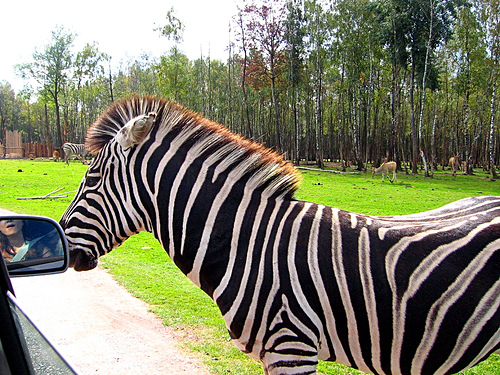

In [ ]:
# from hanspell import spell_checker
# import random 
# i = random.randint(0, len(file_dir))
# image_url = 'https://tensorflow.org/images/surf.jpg'
# image_extension = image_url[-3:]
# image_path = tf.keras.utils.get_file('image'+image_extension, origin=image_url)
# image_path = '/content/1.jpg'
# image_path = path_dir + file_dir[i]
image_path = df_test['testImage_Name'][0]
print(image_path)

prediction_list = []
for i in range(5):
  result, attention_plot = evaluate(image_path)
  caption = ' '.join(result)
  print(f'예측문장{i+1}:', caption)
  # print(f'예측문장{i+1}(원래문장):', ' '.join(result))
  prediction_list.append(caption)
# plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)

## 모델 로드후 Bleu score 계산

In [ ]:
df_test_bleu.head()

,사진경로,캡셔닝_데이터
0,/content/train2014/COCO_train2014_000000457734...,한 여성이 자신의 자동차에서 얼룩말의 사진을 찍는다
1,/content/train2014/COCO_train2014_000000457734...,어른 얼룩말이 차의 조수석 창문 근처에 서 있다
2,/content/train2014/COCO_train2014_000000457734...,밝은 날에 차 옆에 서 있는 얼룩말
3,/content/train2014/COCO_train2014_000000457734...,차량 근처에 서 있는 얼룩말의 근접 촬영지입니다
4,/content/train2014/COCO_train2014_000000457734...,얼룩말과 측면 거울에 비친 암컷


In [ ]:
list(df_test_bleu[df_test_bleu['사진경로'] == df_test_bleu['사진경로'][0]]['캡셔닝_데이터'])

['한 여성이 자신의 자동차에서 얼룩말의 사진을 찍는다 ',
 '어른 얼룩말이 차의 조수석 창문 근처에 서 있다 ',
 '밝은 날에 차 옆에 서 있는 얼룩말',
 '차량 근처에 서 있는 얼룩말의 근접 촬영지입니다 ',
 '얼룩말과 측면 거울에 비친 암컷']

In [ ]:
# df_test_bleu 딕셔너리 변환
from tqdm.notebook import tqdm
bleu_dict = dict()
for name in tqdm(df_test_bleu['사진경로']):
  bleu_dict[name] = list(df_test_bleu[df_test_bleu['사진경로'] == name]['캡셔닝_데이터'])

  0%|          | 0/73675 [00:00<?, ?it/s]

In [ ]:
df_test.head()

,testImage_Name
0,/content/train2014/COCO_train2014_000000457734...
1,/content/train2014/COCO_train2014_000000306060...
2,/content/train2014/COCO_train2014_000000283666...
3,/content/train2014/COCO_train2014_000000452985...
4,/content/train2014/COCO_train2014_000000318924...


In [ ]:
df_test['testImage_Name'][0]

'/content/train2014/COCO_train2014_000000457734.jpg'

In [ ]:
len(bleu_dict), bleu_dict[df_test['testImage_Name'][0]]

(14727,
 ['한 여성이 자신의 자동차에서 얼룩말의 사진을 찍는다 ',
  '어른 얼룩말이 차의 조수석 창문 근처에 서 있다 ',
  '밝은 날에 차 옆에 서 있는 얼룩말',
  '차량 근처에 서 있는 얼룩말의 근접 촬영지입니다 ',
  '얼룩말과 측면 거울에 비친 암컷'])

In [ ]:
# 참고사이트 : https://jrc-park.tistory.com/273
from nltk.translate.bleu_score import corpus_bleu # 레퍼렌스가 여러개일떄 sentence_bleu는 점수가 상승할 수 밖에 없음. / 여러문장을 비교할때는 corpus_bleu를 사용
from nltk.translate.bleu_score import sentence_bleu

def print_bleu(reference, candidate):
  # bleu_sentence = sentence_bleu(reference, candidate)
  bleu_1gram = sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)) # weights를 0.25로 동일하게 주면 1gram부터 4gram까지 같은 수치로 계산(gram이 높아질 수록 연계된 순서를 2~4개까지 고려)

In [ ]:
reference = [["this", "is", "the", "sample"]] 
	    #  ["this", "the", "good","sample"]]
candidate = ['this', "is", "a", "good", "sample"]
sentence_bleu(reference, candidate, weights=(1, 0, 0, 0))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.6

In [ ]:
# 각 단어의 일치여부만 확인하는 유니그램형태로 분석.
references = bleu_dict[df_test['testImage_Name'][0]]
references = list(map(lambda ref: ref.split(), references))
references

[['한', '여성이', '자신의', '자동차에서', '얼룩말의', '사진을', '찍는다'],
 ['어른', '얼룩말이', '차의', '조수석', '창문', '근처에', '서', '있다'],
 ['밝은', '날에', '차', '옆에', '서', '있는', '얼룩말'],
 ['차량', '근처에', '서', '있는', '얼룩말의', '근접', '촬영지입니다'],
 ['얼룩말과', '측면', '거울에', '비친', '암컷']]

In [ ]:
candidate = []
for _ in range(5):
  result, attention_plot = evaluate(df_test['testImage_Name'][0])
# result.remove('<end>')
  candidate.append(result[:-1])
# candidate = result
candidate

[['얼룩말', '두', '마리가', '자동차', '평원에서'],
 ['얼룩말이', '나무', '아래에', '서', '있다'],
 ['얼룩말들이', '풀을', '먹는다'],
 ['얼룩말이', '몇몇', '울타리', '뒤에', '서', '있다'],
 ['두', '마리의', '얼룩말이', '길가의', '풀을', '뜯고', '있다']]

In [ ]:
sentence_bleu(references, candidate[0], weights=(1, 0, 0, 0))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.2

In [ ]:
sentence_bleu(references, candidate[0], weights=(0.5, 0.5, 0, 0))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.447213595499958

In [ ]:
sentence_bleu(references, candidate[0], weights=(0.25, 0.25, 0.25, 0.25))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.668740304976422

In [ ]:
corpus_bleu(references, candidate, weights=(0.25, 0.25, 0.25, 0.25))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.6262844962765469

In [ ]:
corpus_bleu(references, candidate, weights=(0.3, 0.3, 0.3, 0.1))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.5703297064170131

In [ ]:
corpus_bleu(references, candidate, weights=(0.2, 0.4, 0.3, 0.1))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.687728985292546

In [ ]:
corpus_bleu(references, candidate, weights=(0.1, 0.4, 0.4, 0.1))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.8292942694198158

In [ ]:
corpus_bleu(references, candidate, weights=(0.1, 0.3, 0.5, 0.1))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.8292942694198158

In [ ]:
corpus_bleu(references, candidate, weights=(0.1, 0.5, 0.3, 0.1))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


0.8292942694198158

In [ ]:
for i in range(5):
  print(sentence_bleu(references, candidate[i], weights=(0.25, 0.25, 0.25, 0.25)))

0.668740304976422
0.668740304976422
0
0.6389431042462724
0.5169731539571706


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
for i in range(5):
  print(sentence_bleu(references, candidate[i], weights=(0.1, 0.4, 0.4, 0.1)))

0.8513399225207846
0.8513399225207846
0
0.8359588020779368
0.4486852794131401


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
references = bleu_dict[df_test['testImage_Name'][1]]
references = list(map(lambda ref: ref.split(), references))
references

[['두', '사람이', '해변에서', '말을', '타고', '있다'],
 ['남자와', '여자가', '해변에서', '말을', '타고', '있다'],
 ['해변에', '두', '마리의', '갈색', '말을', '탄', '남자와', '여자가', '있다'],
 ['해변에서', '말을', '타는', '소녀와', '남자'],
 ['두', '사람이', '해변에서', '말을', '타고', '있다']]

## 형태소 분석기

In [ ]:
pip install customized_konlpy

In [ ]:
from konlpy.tag import Kkma
from konlpy.utils import pprint
kkma = Kkma()

In [ ]:
test_ref = []
for i in range(5):
  print(references[i])
  test_kr = kkma.nouns(str(references[i]))
  test_ref.append(test_kr)
  print(test_kr)
test_ref

['한', '여성이', '자신의', '자동차에서', '얼룩말의', '사진을', '찍는다']
['여성', '자신', '자동차', '얼룩말', '사진']
['어른', '얼룩말이', '차의', '조수석', '창문', '근처에', '서', '있다']
['어른', '얼룩말', '차', '조', '조수석', '수석', '창문', '근처']
['밝은', '날에', '차', '옆에', '서', '있는', '얼룩말']
['날', '차', '옆', '얼룩말']
['차량', '근처에', '서', '있는', '얼룩말의', '근접', '촬영지입니다']
['차량', '근처', '얼룩말', '근접', '촬영']
['얼룩말과', '측면', '거울에', '비친', '암컷']
['얼룩말', '측면', '거울', '암', '암컷', '컷']


[['여성', '자신', '자동차', '얼룩말', '사진'],
 ['어른', '얼룩말', '차', '조', '조수석', '수석', '창문', '근처'],
 ['날', '차', '옆', '얼룩말'],
 ['차량', '근처', '얼룩말', '근접', '촬영'],
 ['얼룩말', '측면', '거울', '암', '암컷', '컷']]

In [ ]:
test_candi = []
for i in range(5):
  print(candidate[i])
  test_kn = kkma.nouns(str(candidate[i]))
  test_candi.append(test_kn)
  print(test_kn)
test_candi

['얼룩말', '두', '마리가', '자동차', '평원에서']
['얼룩말', '마리', '자동차', '평원']
['얼룩말이', '나무', '아래에', '서', '있다']
['얼룩말', '나무', '아래']
['얼룩말들이', '풀을', '먹는다']
['얼룩말', '풀']
['얼룩말이', '몇몇', '울타리', '뒤에', '서', '있다']
['얼룩말', '울타리', '뒤']
['두', '마리의', '얼룩말이', '길가의', '풀을', '뜯고', '있다']
['마', '얼룩말', '길가', '풀']


[['얼룩말', '마리', '자동차', '평원'],
 ['얼룩말', '나무', '아래'],
 ['얼룩말', '풀'],
 ['얼룩말', '울타리', '뒤'],
 ['마', '얼룩말', '길가', '풀']]

In [ ]:
for i in range(5):
  print(sentence_bleu(test_ref, test_candi[i], weights=(0.25, 0.25, 0.25, 0.25)))

0.8408964152537145
0.5444460596606694
0.30934850332660563
0.5444460596606694
0.7071067811865476


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
test_ref, test_candi

([['여성', '자신', '자동차', '얼룩말', '사진'],
  ['어른', '얼룩말', '차', '조', '조수석', '수석', '창문', '근처'],
  ['날', '차', '옆', '얼룩말'],
  ['차량', '근처', '얼룩말', '근접', '촬영'],
  ['얼룩말', '측면', '거울', '암', '암컷', '컷']],
 [['얼룩말', '마리', '자동차', '평원'],
  ['얼룩말', '나무', '아래'],
  ['얼룩말', '풀'],
  ['얼룩말', '울타리', '뒤'],
  ['마', '얼룩말', '길가', '풀']])

In [ ]:
for i in range(5):
  print(sentence_bleu(test_ref, test_candi[i], weights=(0.25, 0.25, 0.25, 0.25)))

0.8408964152537145
0.5444460596606694
0.30934850332660563
0.5444460596606694
0.7071067811865476


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
for i in range(5):
  print(sentence_bleu(test_ref, test_candi[i], weights=(0.1, 0.4, 0.4, 0.1)))

0.9330329915368074
0.6419822894493751
0.34324365552107977
0.6419822894493751
0.8705505632961241


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


In [ ]:
corpus_bleu(test_ref, test_candi, weights=(0.1, 0.4, 0.4, 0.1))

0

In [ ]:
# 유니그램만 계산 / 1개의 사진당 5개를 예측하고, 각각의 예측값과 원래 캡션과의 bleu 점수 계산 후 평균을 작성하여 리스트에 추가하요 평균값들의 평균을 계산
from tqdm.notebook import tqdm
try:  
  bleu_list = []
  for image_path in tqdm(df_test['testImage_Name'][:1000]):
      bleu_score_list = []
      references = bleu_dict[image_path]
      references = list(map(lambda ref: ref.split(), references))
      test_ref = []
      for i in range(5):
          test_kr = kkma.nouns(str(references[i]))
          test_ref.append(test_kr)
      candidate = []
      for _ in range(5):
          result, attention_plot = evaluate(image_path)
          candidate.append(result[:-1])
      
      test_candi = []
        
      for i in range(5):            
          test_kn = kkma.nouns(str(candidate[i]))
          test_candi.append(test_kn)
      
      bleu_score = corpus_bleu(test_ref, test_candi, weights=(0.1, 0.3, 0.3, 0.3))
      bleu_score_list.append(bleu_score)
      img_bleu_avg = (sum(bleu_score_list) / len(bleu_score_list))
      bleu_list.append(img_bleu_avg)
  print(f'Bleu_Score Average : {(sum(bleu_list) / len(bleu_list))}')
except:
  print(references)
  print(candidate)
  Image.open(image_path)
  

  0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Bleu_Score Average : 0.442456021681598


In [ ]:
# 유니그램만 계산 / 1개의 사진당 5개를 예측하고, 각각의 예측값과 원래 캡션과의 bleu 점수 계산 후 평균을 작성하여 리스트에 추가하요 평균값들의 평균을 계산
from tqdm.notebook import tqdm
try:  
  bleu_list = []
  for image_path in tqdm(df_test['testImage_Name'][:1000]):
      bleu_score_list = []
      references = bleu_dict[image_path]
      references = list(map(lambda ref: ref.split(), references))
      test_ref = []
      for i in range(5):
          test_kr = kkma.nouns(str(references[i]))
          test_ref.append(test_kr)
      candidate = []
      for _ in range(5):
          result, attention_plot = evaluate(image_path)
          candidate.append(result[:-1])
      
      test_candi = []
        
      for i in range(5):            
          test_kn = kkma.nouns(str(candidate[i]))
          test_candi.append(test_kn)
      
      bleu_score = corpus_bleu(test_ref, test_candi, weights=(0.1, 0.4, 0.4, 0.1))
      bleu_score_list.append(bleu_score)
      img_bleu_avg = (sum(bleu_score_list) / len(bleu_score_list))
      bleu_list.append(img_bleu_avg)
  print(f'Bleu_Score Average : {(sum(bleu_list) / len(bleu_list))}')
except:
  print(references)
  print(candidate)
  Image.open(image_path)
  

In [ ]:
# 유니그램만 계산 / 1개의 사진당 5개를 예측하고, 각각의 예측값과 원래 캡션과의 bleu 점수 계산 후 평균을 작성하여 리스트에 추가하요 평균값들의 평균을 계산
from tqdm.notebook import tqdm
try:  
  bleu_list = []
  for image_path in tqdm(df_test['testImage_Name'][:1000]):
      bleu_score_list = []
      references = bleu_dict[image_path]
      references = list(map(lambda ref: ref.split(), references))
      test_ref = []
      for i in range(5):
          test_kr = kkma.nouns(str(references[i]))
          test_ref.append(test_kr)
      candidate = []
      for _ in range(5):
          result, attention_plot = evaluate(image_path)
          candidate.append(result[:-1])
      
      test_candi = []
        
      for i in range(5):            
          test_kn = kkma.nouns(str(candidate[i]))
          test_candi.append(test_kn)
      
      bleu_score = corpus_bleu(test_ref, test_candi, weights=(0.1, 0.3, 0.5, 0.1))
      bleu_score_list.append(bleu_score)
      img_bleu_avg = (sum(bleu_score_list) / len(bleu_score_list))
      bleu_list.append(img_bleu_avg)
  print(f'Bleu_Score Average : {(sum(bleu_list) / len(bleu_list))}')
except:
  print(references)
  print(candidate)
  Image.open(image_path)
  

In [ ]:
# 유니그램만 계산 / 1개의 사진당 5개를 예측하고, 각각의 예측값과 원래 캡션과의 bleu 점수 계산 후 평균을 작성하여 리스트에 추가하요 평균값들의 평균을 계산
from tqdm.notebook import tqdm
try:  
  bleu_list = []
  for image_path in tqdm(df_test['testImage_Name'][:1000]):
      bleu_score_list = []
      references = bleu_dict[image_path]
      references = list(map(lambda ref: ref.split(), references))
      test_ref = []
      for i in range(5):
          test_kr = kkma.nouns(str(references[i]))
          test_ref.append(test_kr)
      candidate = []
      for _ in range(5):
          result, attention_plot = evaluate(image_path)
          candidate.append(result[:-1])
      
      test_candi = []
        
      for i in range(5):            
          test_kn = kkma.nouns(str(candidate[i]))
          test_candi.append(test_kn)
      
      bleu_score = corpus_bleu(test_ref, test_candi, weights=(0.1, 0.5, 0.3, 0.1))
      bleu_score_list.append(bleu_score)
      img_bleu_avg = (sum(bleu_score_list) / len(bleu_score_list))
      bleu_list.append(img_bleu_avg)
  print(f'Bleu_Score Average : {(sum(bleu_list) / len(bleu_list))}')
except:
  print(references)
  print(candidate)
  Image.open(image_path)
  

# --------------------------------------------------------------------

In [ ]:
break

SyntaxError: ignored

In [ ]:
# 오류 참고 사이트 : https://github.com/nltk/nltk/issues/1838
# 유니그램만 계산
from tqdm.notebook import tqdm
bleu_list = []
for image_path in tqdm(df_test['testImage_Name']):
  references = bleu_dict[image_path]
  references = list(map(lambda ref: ref.split(), references))
  result, attention_plot = evaluate(image_path)
  candidate = result[:-1]
  bleu_score = sentence_bleu(references, candidate, weights=(1, 0, 0, 0))
  bleu_list.append(bleu_score)
print(f'Bleu_Score Average : {sum(bleu_list) / len(bleu_list)}')

In [ ]:
# 유니그램만 계산 / 1개의 사진당 5개를 예측하고, 각각의 예측값과 원래 캡션과의 bleu 점수 계산 후 평균을 작성하여 리스트에 추가하요 평균값들의 평균을 계산
from tqdm.notebook import tqdm
bleu_list = []
for image_path in tqdm(df_test['testImage_Name']):
  bleu_score_list = []
  references = bleu_dict[image_path]
  references = list(map(lambda ref: ref.split(), references))
  for _ in range(5):
    result, attention_plot = evaluate(image_path)
    candidate = result[:-1]
    bleu_score = sentence_bleu(references, candidate, weights=(1, 0, 0, 0))
    bleu_score_list.append(bleu_score)
  img_bleu_avg = (sum(bleu_score_list) / len(bleu_score_list))
  bleu_list.append(img_bleu_avg)
print(f'Bleu_Score Average : {(sum(bleu_list) / len(bleu_list))}')